## Problema 1. 

In [ ]:
"""
De la tabla breast cancer realiza un análisis de PCA
"""
import pandas as pd
ruta = "https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase6/breast-cancer.csv"
df_cancer = pd.read_csv(ruta)
print(df_cancer.head())

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]


In [ ]:
import numpy as np
x_df = df_cancer.drop(columns=["id","diagnosis"])


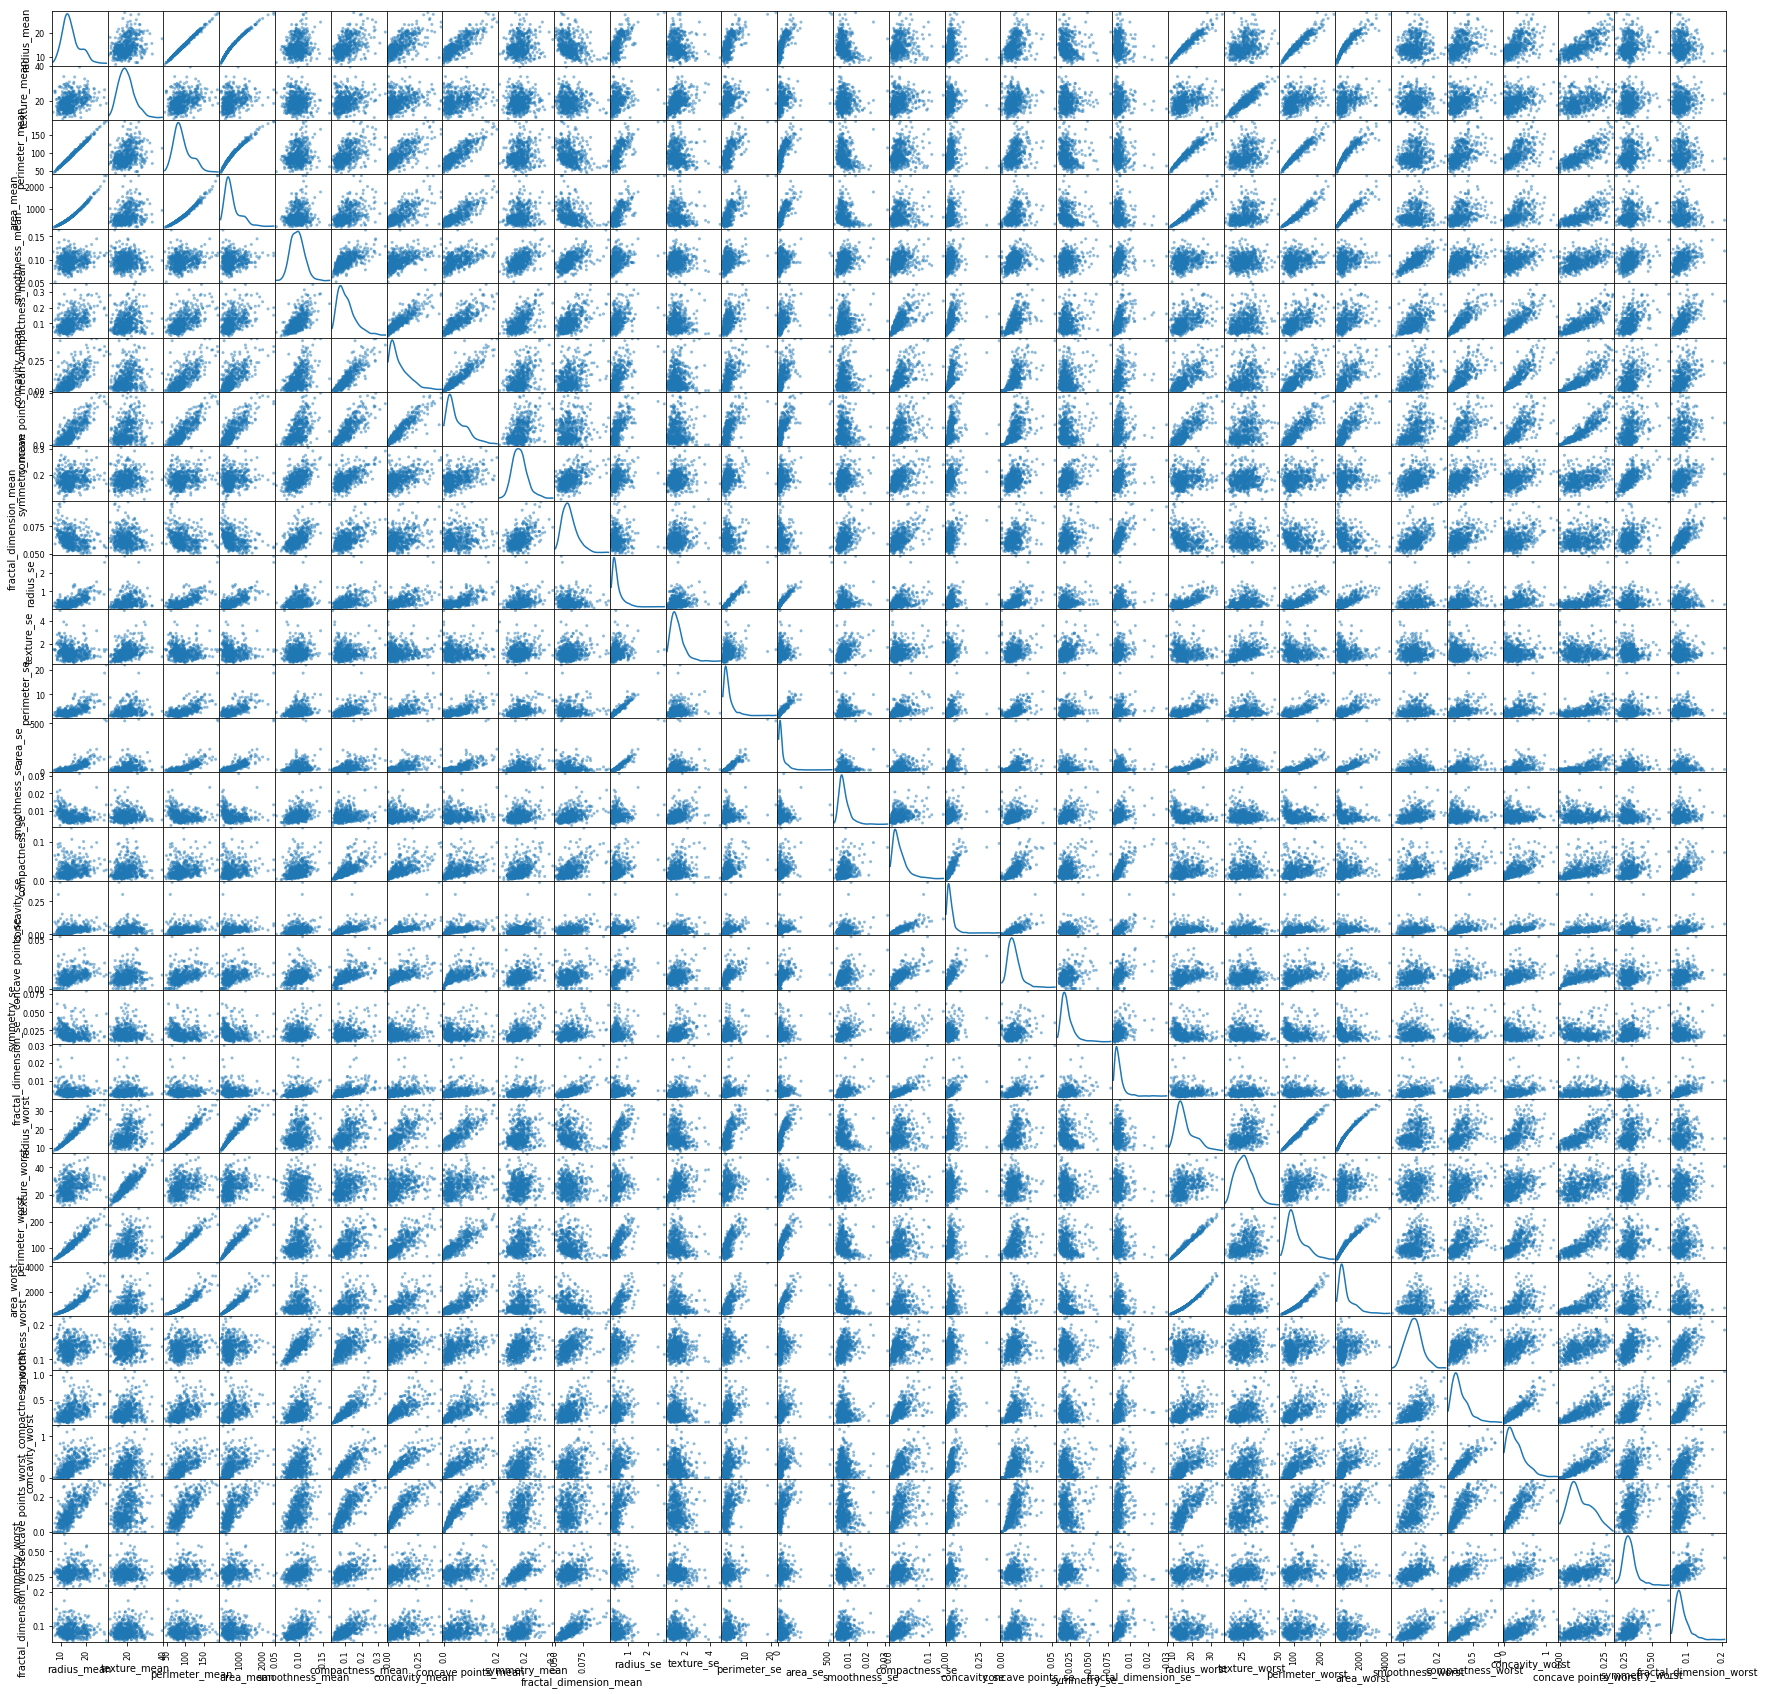

In [ ]:
#matriz de dispersion
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(x_df,figsize = (30,30),diagonal = "kde")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()
x_escalador=escalador.fit_transform(x_df)
print(x_escalador[0,:])

[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
 0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
 0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
 0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
 0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]


In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2) # reduccion dimensional a dos dimensiones
#Generar el valor de matriz de autovalores
pca1.fit(x_escalador)
Xpca = pca1.transform(x_escalador)
print(x_escalador[0,:])
print(Xpca[0,:])
pca1.components_ # esta matriz es la que se llama matriz de componentes o PCA



[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
 0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
 0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
 0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
 0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
[1.38702121 0.42689533]


array([[ 2.42675774e-01,  9.64786101e-02,  2.52550175e-01,
         2.16494530e-01,  1.09694618e-01,  2.40397602e-01,
         3.01914206e-01,  3.22475470e-01,  1.11431911e-01,
         4.32983397e-02,  1.21760615e-01, -3.91796003e-05,
         1.18580603e-01,  1.03569266e-01, -4.68418094e-03,
         1.29319789e-01,  6.56807080e-02,  1.24746120e-01,
         1.44902467e-02,  4.55013416e-02,  2.59386850e-01,
         1.13833007e-01,  2.60708399e-01,  2.05917767e-01,
         1.23773566e-01,  2.04993413e-01,  2.44083623e-01,
         3.71065064e-01,  9.59229054e-02,  9.46335142e-02],
       [-2.61316697e-01, -5.90579194e-02, -2.38590061e-01,
        -2.31106830e-01,  1.99883951e-01,  2.13914883e-01,
         1.13810591e-01, -8.31206237e-03,  2.11115126e-01,
         4.06392087e-01, -6.68985209e-02,  6.00114468e-02,
        -5.14164640e-02, -8.29631528e-02,  1.35596439e-01,
         2.22352585e-01,  1.02792720e-01,  1.05646780e-01,
         1.40474907e-01,  1.71995173e-01, -2.44281614e-

In [ ]:
### podemos hacer un grafico de dispersion de clases
print(np.shape(Xpca))
# definimos el y
y = np.array(df_cancer["diagnosis"])
print(np.shape(y))


(569, 2)
(569,)


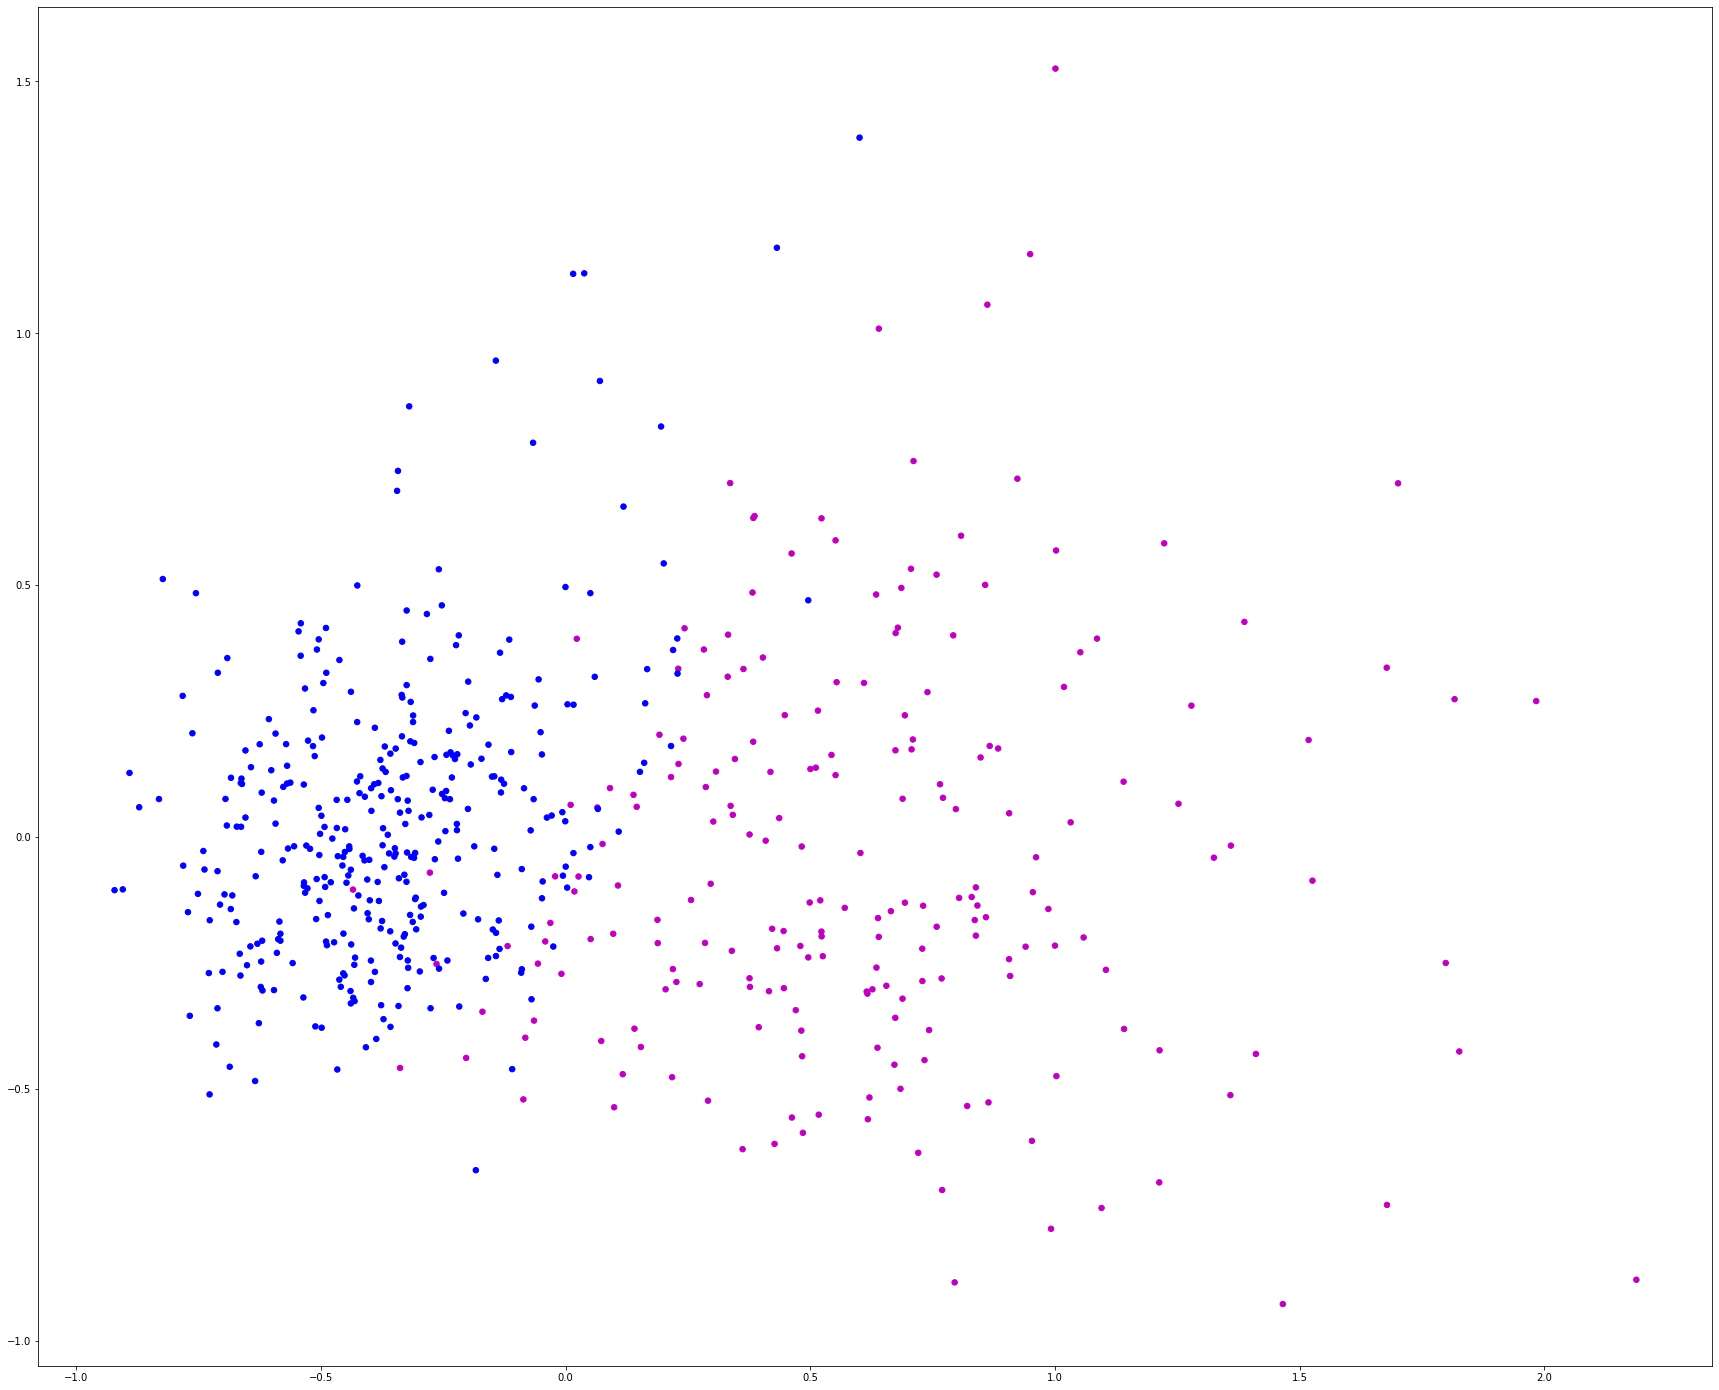

In [ ]:
#podemos hacer un grafico de dispersion 1)matplotlib y 
plt.figure(figsize=(30,25))
plt.scatter(Xpca[:,0],Xpca[:,1],color = y, s = 30)



## Problema 2

In [ ]:
"""
Realiza un método de Kmeans para la data de Mall_Customers
"""
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
 
df_mallcostumers = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase6/Mall_Customers.csv")
print(df_mallcostumers.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
#data escalada y homegenea
#paso nro 1
x_featuresdf = df_mallcostumers.drop(columns = ["CustomerID"])
#obtenemos la matriz de caracteristicas a analizar
x_featuresarray = np.array(x_featuresdf)

In [ ]:
### encoding porque tenemos variables no numericas
from sklearn.preprocessing import LabelEncoder

x_features_genero = x_featuresdf["Gender"]
x_feat_gen_array = np.array(x_features_genero)
Encoder = LabelEncoder()
x_gen_encoder = Encoder.fit_transform(x_feat_gen_array)
print(x_gen_encoder)


[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [ ]:
#eliminar el x_gen e ingresamos el x gen codificado
x_singen = x_featuresdf.drop(columns = ["Gender"])
x_singen["Genero escalado"] = x_gen_encoder
print(x_singen)

     Age  Annual Income (k$)  Spending Score (1-100)  Genero escalado
0     19                  15                      39                1
1     21                  15                      81                1
2     20                  16                       6                0
3     23                  16                      77                0
4     31                  17                      40                0
..   ...                 ...                     ...              ...
195   35                 120                      79                0
196   45                 126                      28                0
197   32                 126                      74                1
198   32                 137                      18                1
199   30                 137                      83                1

[200 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_escalado = scaler.fit_transform(np.array(x_singen))
print(x_escalado)

[[0.01923077 0.         0.3877551  1.        ]
 [0.05769231 0.         0.81632653 1.        ]
 [0.03846154 0.00819672 0.05102041 0.        ]
 [0.09615385 0.00819672 0.7755102  0.        ]
 [0.25       0.01639344 0.39795918 0.        ]
 [0.07692308 0.01639344 0.76530612 0.        ]
 [0.32692308 0.02459016 0.05102041 0.        ]
 [0.09615385 0.02459016 0.94897959 0.        ]
 [0.88461538 0.03278689 0.02040816 1.        ]
 [0.23076923 0.03278689 0.7244898  0.        ]
 [0.94230769 0.03278689 0.13265306 1.        ]
 [0.32692308 0.03278689 1.         0.        ]
 [0.76923077 0.04098361 0.14285714 0.        ]
 [0.11538462 0.04098361 0.7755102  0.        ]
 [0.36538462 0.04098361 0.12244898 1.        ]
 [0.07692308 0.04098361 0.79591837 1.        ]
 [0.32692308 0.04918033 0.34693878 0.        ]
 [0.03846154 0.04918033 0.66326531 1.        ]
 [0.65384615 0.06557377 0.28571429 1.        ]
 [0.32692308 0.06557377 0.98979592 0.        ]
 [0.32692308 0.07377049 0.34693878 1.        ]
 [0.13461538 

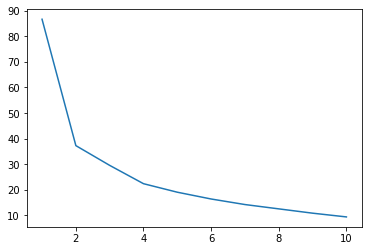

In [ ]:
### aplicar k means
#dibujamos el codo de jambu para tener el mejor k
from sklearn.cluster import KMeans
inercia = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(x_escalado)
  inercia.append(k_means.inertia_)
# visualizar el codo de yambu
plt.plot(range(1,11),inercia)



In [ ]:
#k =4
k_means2 = KMeans(n_clusters = 4)
k_means2.fit(x_escalado)
labels = k_means2.labels_


In [ ]:
labels  

array([1, 1, 0, 3, 3, 3, 0, 3, 2, 3, 2, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3,
       0, 3, 0, 3, 3, 3, 0, 1, 3, 2, 0, 2, 0, 2, 3, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 3, 2, 0, 0, 0, 2, 1, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 1, 2, 0, 3, 1, 0, 3, 2, 1, 3, 0, 2, 1, 2, 3, 0, 2, 2, 2,
       2, 3, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1,
       3, 3, 2, 3, 0, 1, 2, 3, 0, 1, 3, 3, 2, 1, 2, 3, 0, 1, 2, 1, 0, 3,
       0, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3,
       2, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 0, 3, 0, 1,
       2, 1], dtype=int32)

In [ ]:
###calculando la forma
np.shape(labels)

(200,)

In [ ]:
###para graficar primero PCA
pca3 = PCA(n_components = 2)
pca3.fit(x_escalado)
xpca = pca3.fit_transform(x_escalado)
np.shape(xpca)


(200, 2)

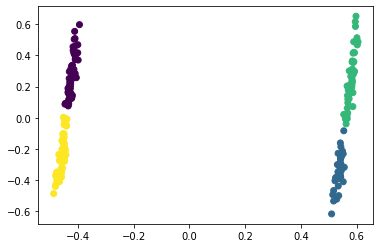

In [ ]:
plt.scatter(xpca[:,0],xpca[:,1],c = labels)
plt.show()

In [ ]:
# Para el dataset iris, realiza un análisis de K-means

(150, 4)


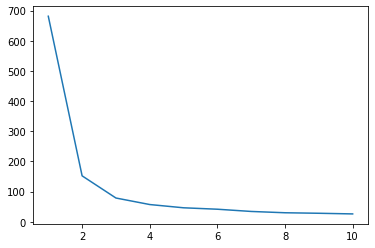

In [ ]:
#Para el datasets make_blobs realiza un análisis de k_means
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.metrics import r2_score,precision_score

import numpy as np
df_iris = datasets.load_iris()
x_iris =df_iris.data
y_iris =df_iris.target
lista_inercias = []
for i in range(1,11):

  k_mean = KMeans(n_clusters=i)
  k_mean.fit(x_iris)
  lista_inercias.append(k_mean.inertia_)
plt.plot(range(1,11),lista_inercias)
print(np.shape(x_iris))

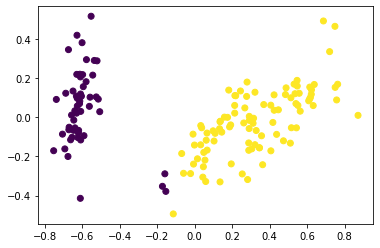

In [ ]:
import numpy as np
k_mean2 = KMeans(2)
k_mean2.fit(x_iris)
label = k_mean2.labels_
x_escala = MMS()
x_escalar = x_escala.fit_transform(x_iris)

pca = PCA(n_components=2)
xpca = pca.fit_transform(x_escalar)

plt.scatter(xpca[:,0],xpca[:,1],c = label)

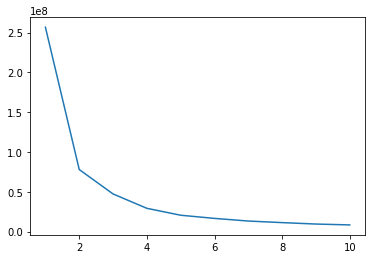

In [ ]:
df_breastcancer = datasets.load_breast_cancer()
x_cancer = df_breastcancer.data
y_cancer = df_breastcancer.target
lista_cancer = []
for i in range(1,11):
  k_mean_c = KMeans(n_clusters= i)
  k_mean_c.fit(x_cancer) 
  lista_cancer.append(k_mean_c.inertia_)
plt.plot(range(1,11),lista_cancer)  

In [ ]:

x_escala_cancer = MMS()
x_escalado = x_escala.fit_transform(x_cancer)
k_mean_c2 = KMeans(n_clusters= 2)
k_mean_c2.fit(x_escalado)
label = k_mean_c2.labels_


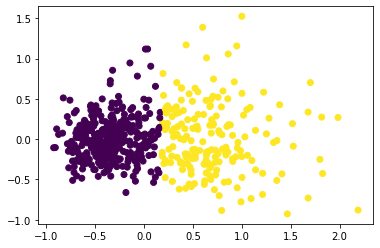

In [ ]:
#Para el dataset de sklearn load_breast_cancer realiza un análisis de PCA para n_dim = 2

pca_cancer = PCA(n_components = 2)
xpca_cancer = pca_cancer.fit_transform(x_escalado)
plt.scatter(xpca_cancer[:,0],xpca_cancer[:,1],c = label)


In [42]:
#Compara el algoritmo SGB para clasificación con load_breast_cancer aplicando PCA para n_dim= 2 y sin PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score,precision_score
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data_cancer = datasets.load_breast_cancer()
x_datacancer = data_cancer.data
y_datacancer = data_cancer.target
# estandarizar los datos
i = 0
z= 0
x_estandarizado = []
x_normalizado = []
for j in range(0,30):
     if np.all(x_datacancer[:,j]>0):
        x_estandarizado.append([])
        x_estandarizado[i] = stats.boxcox(x_datacancer[:,j])[0]
        #x_estandarizado_list=x_estandarizado[z].tolist()
        i+=1
     else:
        x_normalizado.append([])
        x_normalizado[z] = x_datacancer[:,j]
        z+=1

    #x_normalizado.append([])
       
      # x_normalizado[z] = x_datacancer[:,j]
       #x_normalizado[z]=np.reshape(x_normalizado[z],(len(x_normalizado[z]),1))
       #x_normal = StandardScaler()
       #x_normal.fit_transform(x_normalizado[z])
      # x_normalizado[z]=np.reshape(x_normalizado[z],(len(x_normalizado[z]),))

       #x_normalizado_list = x_normalizado[z].tolist()
       
#x_preprocesado = np.concatenate((x_estandarizado,x_normalizado))
x_normalizado = np.reshape(x_normalizado,(len(x_normalizado[:][0]),z))
x_estandarizado = np.reshape(x_estandarizado,(len(x_estandarizado[:][0]),i))
print(np.shape(x_estandarizado))
print(np.shape(x_normalizado))
#escalar los datos
x_concatenado = np.c_[x_normalizado,x_estandarizado]


x_escalar_cancer = MMS()
x_escalado_cancer = x_escalar_cancer.fit_transform(x_concatenado)
y_escalado_cancer = np.reshape(y_datacancer,(len(y_datacancer),1))
#x_escalado_cancer2 = x_escalar_cancer.fit_transform(x_estandarizado)
y_escalado_cancer = x_escalar_cancer.fit_transform(y_escalado_cancer)







(569, 24)
(569, 6)


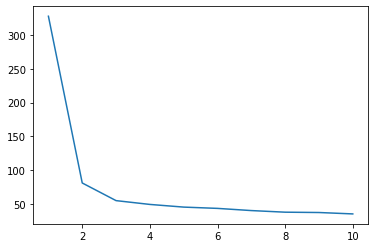

In [43]:
#clusterizacion
lista_clusters = []
for i in range(1,11):
  k_mean = KMeans(n_clusters=i)
  k_mean.fit(x_escalado_cancer)
  lista_clusters.append(k_mean.inertia_)
plt.plot(range(1,11),lista_clusters)

In [44]:
k_means2= KMeans(n_clusters = 2)
k_means2.fit(x_escalado_cancer)
label = k_means2.labels_

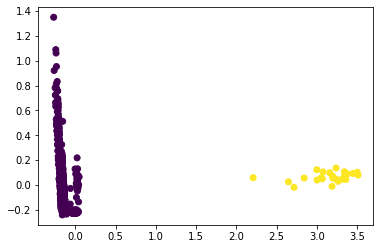

In [45]:
pca = PCA(n_components = 2)
xpca = pca.fit_transform(x_escalado_cancer)
plt.scatter(xpca[:,0],xpca[:,1],c=label)

In [52]:
#SGB

model_GBC = GBC(learning_rate=0.1,n_estimators=100)
xtrain,xtest,ytrain,ytest=tts(xpca,y_escalado_cancer,test_size = 0.2,random_state = 42)
model_GBC.fit(xtrain,ytrain)
y_predict_cancer = model_GBC.predict(xtest)
y_predict_cancer_train = model_GBC.predict(xtrain)
r2 = r2_score(ytest,y_predict_cancer)
r2_train = r2_score(ytrain,y_predict_cancer_train)
precision = precision_score(ytest,y_predict_cancer)
precision_train = precision_score(ytrain,y_predict_cancer_train)
print(precision)
print(precision_train)
print(np.shape(xpca))

0.72
0.8452012383900929
(569, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
model_GBC2 = GBC(learning_rate=0.1,n_estimators=100)
xtrain2,xtest2,ytrain2,ytest2=tts(x_escalado_cancer,y_escalado_cancer,test_size = 0.2,random_state = 42)
model_GBC2.fit(xtrain2,ytrain2)
y_predict_cancer2 = model_GBC2.predict(xtest2)
y_predict_cancer_train2 = model_GBC2.predict(xtrain2)
precision2 = precision_score(ytest2,y_predict_cancer2)
precision_train2 = precision_score(ytrain2,y_predict_cancer_train2)
print(precision2)
print(precision_train2)




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6511627906976745
0.9438943894389439


In [48]:
print(np.shape(x_escalado_cancer))

(569, 30)


In [49]:
from sklearn.utils.extmath import softmax
#redes neuronales
xtrainn,xtestn,ytrainn,ytestn=tts(x_escalado_cancer,y_escalado_cancer,test_size = 0.2,random_state = 42)

import tensorflow as tf
modeloNN = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation ="relu"),                          
      tf.keras.layers.Dense(16,activation ="relu"),                          
                             
      tf.keras.layers.Dense(8,activation ="relu"),                          
      tf.keras.layers.Dense(4,activation ="relu"),                          
      tf.keras.layers.Dense(2,activation ="relu"),                          
      tf.keras.layers.Dense(1,activation ="sigmoid"),                          



])
modeloNN.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.SGD(),metrics = ["accuracy"])



In [50]:
modeloNN.fit(xtrainn,ytrainn,epochs = 100)


Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.7226 - accuracy: 0.3714
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4242
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6308
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6286
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6286
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6286
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6286
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6286
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6286
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6286
Epoch 11/

In [51]:
y_predict_cancern = modeloNN.predict(xtestn)
y_predict_cancer_trainn = modeloNN.predict(xtrainn)
modeloNN.evaluate(xtestn,ytestn)[0]

4/4 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6228


0.66267329454422

In [11]:
print(y_predict_cancern)


[[0.8621006 ]
 [0.4154052 ]
 [0.4154052 ]
 [0.9483893 ]
 [0.96206987]
 [0.4154052 ]
 [0.4154052 ]
 [0.4154052 ]
 [0.5619342 ]
 [0.9464657 ]
 [0.8828653 ]
 [0.42680168]
 [0.9144507 ]
 [0.56312436]
 [0.9274851 ]
 [0.4154052 ]
 [0.9215858 ]
 [0.96511674]
 [0.96702385]
 [0.4154052 ]
 [0.6724242 ]
 [0.9497433 ]
 [0.4154052 ]
 [0.9632039 ]
 [0.9617686 ]
 [0.9601649 ]
 [0.90813947]
 [0.92221105]
 [0.9414508 ]
 [0.4154052 ]
 [0.96251863]
 [0.9561695 ]
 [0.96724105]
 [0.9227315 ]
 [0.96409184]
 [0.9610743 ]
 [0.61241835]
 [0.960312  ]
 [0.4154052 ]
 [0.8737703 ]
 [0.966735  ]
 [0.4154052 ]
 [0.9175049 ]
 [0.9483117 ]
 [0.9331377 ]
 [0.8834816 ]
 [0.9662751 ]
 [0.96050894]
 [0.9087467 ]
 [0.9018614 ]
 [0.4154052 ]
 [0.4154052 ]
 [0.75898445]
 [0.9051533 ]
 [0.964811  ]
 [0.84045076]
 [0.9612603 ]
 [0.4154052 ]
 [0.4154052 ]
 [0.95782644]
 [0.92651576]
 [0.4154052 ]
 [0.4154052 ]
 [0.8795906 ]
 [0.95871747]
 [0.7643968 ]
 [0.4154052 ]
 [0.4154052 ]
 [0.9614617 ]
 [0.87558186]
 [0.4154052 ]
 [0.41

In [12]:
r2n = r2_score(ytestn,y_predict_cancern)
r2_trainn = r2_score(ytrainn,y_predict_cancer_trainn)
print(r2n)
print(r2_trainn)

0.6357857543896541
0.6096972751583754


In [ ]:
#Para el dataset csv del github breast cancer, computariza el método de agrupación jerárquica y establece las etiquetas, para t = 3